# Agregación de datos por categoría

In [1]:
import numpy as np
import pandas as pd

In [2]:
generos  = ["Masculino", "Femenino", "No Binario"]
ingresos = ["Pobre", "Clase Media", "Rico"]

In [3]:
n = 500

genero_data = []
ingreso_data = []

for i in range(0,500):
    genero_data.append(np.random.choice(generos,   p = [0.45,0.45,0.1]))
    ingreso_data.append(np.random.choice(ingresos ,p = [0.5,0.3,0.2]))

In [4]:
print(genero_data[1:100])

['Masculino', 'No Binario', 'Femenino', 'Femenino', 'Masculino', 'Masculino', 'Femenino', 'Masculino', 'Masculino', 'Femenino', 'Masculino', 'Masculino', 'Masculino', 'Femenino', 'Masculino', 'Masculino', 'Femenino', 'Femenino', 'Masculino', 'Femenino', 'Femenino', 'Masculino', 'Masculino', 'Masculino', 'No Binario', 'Masculino', 'Masculino', 'Masculino', 'Femenino', 'Femenino', 'Femenino', 'No Binario', 'Femenino', 'Masculino', 'Masculino', 'Masculino', 'Masculino', 'Masculino', 'Femenino', 'Femenino', 'Masculino', 'Femenino', 'Femenino', 'Femenino', 'No Binario', 'Femenino', 'Masculino', 'Masculino', 'Femenino', 'Masculino', 'Femenino', 'Masculino', 'Femenino', 'Femenino', 'Femenino', 'Masculino', 'Femenino', 'Femenino', 'Femenino', 'Masculino', 'Femenino', 'Masculino', 'Femenino', 'Masculino', 'Masculino', 'Femenino', 'Femenino', 'No Binario', 'Femenino', 'Masculino', 'Femenino', 'Masculino', 'Femenino', 'Masculino', 'Femenino', 'Femenino', 'Femenino', 'No Binario', 'Femenino', 'Fem

In [5]:
print(genero_data.count("Masculino"))
print(genero_data.count("Femenino"))
print(genero_data.count("No Binario"))

202
251
47


In [6]:
print(ingreso_data[1:10])
print(ingreso_data.count("Pobre"))
print(ingreso_data.count("Clase Media"))
print(ingreso_data.count("Rico"))

['Rico', 'Clase Media', 'Pobre', 'Clase Media', 'Pobre', 'Clase Media', 'Pobre', 'Rico', 'Pobre']
253
145
102


In [7]:
#Z -> N(0,1)
#N(m, s) -> m + s * Z
Altura = 160 + 30 * np.random.randn(n)
Peso   = 65 + 25 * np.random.randn(n)
Edad   = 30 + 12 * np.random.randn(n)

In [8]:
import random

In [9]:
random.randint(0,10)

4

In [10]:
Ingreso = [ ((x == "Rico") * 200000 or (x == "Clase Media") * 60000 or 20000) 
           + 3500 * random.randint(5,15) for x in ingreso_data] 


In [11]:
data = pd.DataFrame(
    {
        "Genero"            : genero_data,
        "Estatus Economico" : ingreso_data,
        "Altura"            : Altura,
        "Peso"              : Peso,
        "Edad"              : Edad,
        "Ingreso"           : Ingreso
    }
)

In [12]:
data.head()

,Genero,Estatus Economico,Altura,Peso,Edad,Ingreso
0,Femenino,Pobre,121.105334,60.586384,26.866453,51500
1,Masculino,Rico,149.542718,55.672485,30.799029,217500
2,No Binario,Clase Media,169.770385,61.715398,21.263365,112500
3,Femenino,Pobre,132.062929,94.442491,45.315431,51500
4,Femenino,Clase Media,172.750533,65.737278,4.459296,112500


## Agrupación de datos

In [13]:
agrupo_genero = data.groupby("Genero")

In [14]:
agrupo_genero.groups

{'Femenino': Int64Index([  0,   3,   4,   7,  10,  14,  17,  18,  20,  21,
             ...
             477, 480, 483, 485, 486, 492, 494, 495, 497, 499],
            dtype='int64', length=251),
 'Masculino': Int64Index([  1,   5,   6,   8,   9,  11,  12,  13,  15,  16,
             ...
             471, 472, 474, 478, 479, 482, 487, 489, 490, 493],
            dtype='int64', length=202),
 'No Binario': Int64Index([  2,  25,  32,  45,  68,  78, 103, 119, 132, 152, 159, 161, 178,
             211, 212, 217, 218, 223, 229, 234, 247, 250, 265, 275, 279, 310,
             314, 326, 329, 334, 336, 345, 350, 356, 360, 373, 374, 384, 442,
             449, 455, 481, 484, 488, 491, 496, 498],
            dtype='int64')}

In [15]:
for nombre, grupo in agrupo_genero :
    print(nombre)
    display(grupo.head())

Femenino


,Genero,Estatus Economico,Altura,Peso,Edad,Ingreso
0,Femenino,Pobre,121.105334,60.586384,26.866453,51500
3,Femenino,Pobre,132.062929,94.442491,45.315431,51500
4,Femenino,Clase Media,172.750533,65.737278,4.459296,112500
7,Femenino,Pobre,138.916941,61.288424,9.103243,62000
10,Femenino,Pobre,152.349228,46.275440,41.352342,72500


Masculino


,Genero,Estatus Economico,Altura,Peso,Edad,Ingreso
1,Masculino,Rico,149.542718,55.672485,30.799029,217500
5,Masculino,Pobre,168.374142,85.383797,15.339581,48000
6,Masculino,Clase Media,139.993238,22.882991,30.327489,95000
8,Masculino,Rico,186.372554,91.808471,26.042621,221000
9,Masculino,Pobre,165.835850,74.460843,10.078634,51500


No Binario


,Genero,Estatus Economico,Altura,Peso,Edad,Ingreso
2,No Binario,Clase Media,169.770385,61.715398,21.263365,112500
25,No Binario,Clase Media,169.472665,65.349502,30.187752,105500
32,No Binario,Clase Media,195.693744,37.370473,13.782090,84500
45,No Binario,Clase Media,87.723325,69.499937,15.594897,98500
68,No Binario,Rico,112.670358,25.163384,16.110023,231500


In [16]:
agrupo_genero.get_group("Femenino")

,Genero,Estatus Economico,Altura,Peso,Edad,Ingreso
0,Femenino,Pobre,121.105334,60.586384,26.866453,51500
3,Femenino,Pobre,132.062929,94.442491,45.315431,51500
4,Femenino,Clase Media,172.750533,65.737278,4.459296,112500
7,Femenino,Pobre,138.916941,61.288424,9.103243,62000
10,Femenino,Pobre,152.349228,46.275440,41.352342,72500
...,...,...,...,...,...,...
492,Femenino,Pobre,141.644572,41.958730,10.760569,72500
494,Femenino,Pobre,193.456568,66.479704,10.303878,58500
495,Femenino,Pobre,155.396546,64.977534,8.751968,55000
497,Femenino,Clase Media,151.448050,47.346753,39.513564,102000


In [17]:
doble_grupo = data.groupby(["Genero", "Estatus Economico"])

In [18]:
len(doble_grupo)

9

In [19]:
for nombre, grupo in doble_grupo:
    print(nombre)
    display(grupo.head())
    print()

('Femenino', 'Clase Media')


,Genero,Estatus Economico,Altura,Peso,Edad,Ingreso
4,Femenino,Clase Media,172.750533,65.737278,4.459296,112500
17,Femenino,Clase Media,197.841252,37.651818,41.390629,81000
21,Femenino,Clase Media,88.730682,37.646011,27.611729,105500
30,Femenino,Clase Media,217.646217,35.010179,18.497183,77500
44,Femenino,Clase Media,161.115790,58.715591,38.205724,91500



('Femenino', 'Pobre')


,Genero,Estatus Economico,Altura,Peso,Edad,Ingreso
0,Femenino,Pobre,121.105334,60.586384,26.866453,51500
3,Femenino,Pobre,132.062929,94.442491,45.315431,51500
7,Femenino,Pobre,138.916941,61.288424,9.103243,62000
10,Femenino,Pobre,152.349228,46.275440,41.352342,72500
14,Femenino,Pobre,212.032658,39.105270,28.414979,65500



('Femenino', 'Rico')


,Genero,Estatus Economico,Altura,Peso,Edad,Ingreso
18,Femenino,Rico,156.898338,51.977973,28.204041,249000
20,Femenino,Rico,178.818955,62.440926,33.047911,228000
61,Femenino,Rico,164.020245,59.115217,33.999083,231500
73,Femenino,Rico,163.237564,43.416838,32.891976,252500
76,Femenino,Rico,142.885583,116.538565,25.380849,238500



('Masculino', 'Clase Media')


,Genero,Estatus Economico,Altura,Peso,Edad,Ingreso
6,Masculino,Clase Media,139.993238,22.882991,30.327489,95000
16,Masculino,Clase Media,158.284455,64.300317,23.498805,91500
37,Masculino,Clase Media,171.964331,55.380845,22.231400,77500
47,Masculino,Clase Media,147.471236,37.386751,42.947627,81000
52,Masculino,Clase Media,161.060544,-2.189897,10.934296,88000



('Masculino', 'Pobre')


,Genero,Estatus Economico,Altura,Peso,Edad,Ingreso
5,Masculino,Pobre,168.374142,85.383797,15.339581,48000
9,Masculino,Pobre,165.835850,74.460843,10.078634,51500
11,Masculino,Pobre,174.071243,102.605732,27.541992,37500
12,Masculino,Pobre,133.693289,15.495161,16.276908,58500
13,Masculino,Pobre,98.991085,100.802096,38.992502,69000



('Masculino', 'Rico')


,Genero,Estatus Economico,Altura,Peso,Edad,Ingreso
1,Masculino,Rico,149.542718,55.672485,30.799029,217500
8,Masculino,Rico,186.372554,91.808471,26.042621,221000
22,Masculino,Rico,145.661903,94.851165,35.568554,217500
23,Masculino,Rico,138.130247,90.636475,38.766634,238500
26,Masculino,Rico,153.774573,31.069739,20.261342,252500



('No Binario', 'Clase Media')


,Genero,Estatus Economico,Altura,Peso,Edad,Ingreso
2,No Binario,Clase Media,169.770385,61.715398,21.263365,112500
25,No Binario,Clase Media,169.472665,65.349502,30.187752,105500
32,No Binario,Clase Media,195.693744,37.370473,13.782090,84500
45,No Binario,Clase Media,87.723325,69.499937,15.594897,98500
103,No Binario,Clase Media,143.624025,76.085067,38.175584,102000



('No Binario', 'Pobre')


,Genero,Estatus Economico,Altura,Peso,Edad,Ingreso
78,No Binario,Pobre,169.070778,88.215059,43.953564,72500
119,No Binario,Pobre,200.097511,48.799510,31.486003,37500
132,No Binario,Pobre,111.677209,61.811360,38.941178,62000
152,No Binario,Pobre,182.576290,53.835574,29.783284,44500
159,No Binario,Pobre,156.706500,69.897626,21.920666,48000



('No Binario', 'Rico')


,Genero,Estatus Economico,Altura,Peso,Edad,Ingreso
68,No Binario,Rico,112.670358,25.163384,16.110023,231500
212,No Binario,Rico,118.651278,85.200619,42.263545,217500
275,No Binario,Rico,234.184379,70.421160,1.325927,242000
373,No Binario,Rico,141.623779,90.686305,24.052694,252500
442,No Binario,Rico,173.041743,-24.342075,33.593779,224500


## Operaciones sobre datos agrupados

In [20]:
doble_grupo.sum()

Altura         Peso         Edad   Ingreso
Genero     Estatus Economico                                                  
Femenino   Clase Media        12347.978051  4488.730816  2296.783371   7191500
           Pobre              19379.310895  8439.943309  3445.917356   6837000
           Rico                8511.019037  3416.718365  1724.175026  12837500
Masculino  Clase Media         8468.258532  3122.126643  1530.169202   5045500
           Pobre              16872.940867  7248.027646  3050.976244   5944500
           Rico                6604.104529  2727.648058  1223.668961   9950500
No Binario Clase Media         2813.416178   985.315889   441.783665   1671000
           Pobre               3874.896852  1746.076160   763.391915   1347000
           Rico                 780.171537   247.129393   117.345967   1168000

In [21]:
doble_grupo.mean()

Altura       Peso       Edad        Ingreso
Genero     Estatus Economico                                                 
Femenino   Clase Media        164.639707  59.849744  30.623778   95886.666667
           Pobre              160.159594  69.751598  28.478656   56504.132231
           Rico               154.745801  62.122152  31.348637  233409.090909
Masculino  Clase Media        159.778463  58.908050  28.871117   95198.113208
           Pobre              157.691036  67.738576  28.513797   55556.074766
           Rico               157.240584  64.944001  29.134975  236916.666667
No Binario Clase Media        165.495069  57.959758  25.987274   98294.117647
           Pobre              154.995874  69.843046  30.535677   53880.000000
           Rico               156.034307  49.425879  23.469193  233600.000000

In [22]:
doble_grupo.size()

Genero      Estatus Economico
Femenino    Clase Media           75
            Pobre                121
            Rico                  55
Masculino   Clase Media           53
            Pobre                107
            Rico                  42
No Binario  Clase Media           17
            Pobre                 25
            Rico                   5
dtype: int64

In [23]:
doble_grupo.describe()

Altura                                     \
                              count        mean        std         min   
Genero     Estatus Economico                                             
Femenino   Clase Media         75.0  164.639707  35.711810   88.730682   
           Pobre              121.0  160.159594  29.008631   81.964577   
           Rico                55.0  154.745801  28.034182   83.788068   
Masculino  Clase Media         53.0  159.778463  28.343377   97.136183   
           Pobre              107.0  157.691036  31.656780   79.632758   
           Rico                42.0  157.240584  27.610322  106.208083   
No Binario Clase Media         17.0  165.495069  24.680786   87.723325   
           Pobre               25.0  154.995874  21.171863  111.677209   
           Rico                 5.0  156.034307  49.704811  112.670358   

                                                                              \
                                     25%         50%         75%         max   
Genero     Estatus Economico                                                   
Femenino   Clase Media        139.057592  161.115790  190.201392  261.466563   
           Pobre              138.804215  157.346536  178.849182  223.139759   
           Rico               131.481531  159.247838  176.190176  213.892033   
Masculino  Clase Media        142.164373  161.060544  173.252902  245.940170   
           Pobre              135.312354  155.200953  182.376320  223.373998   
           Rico               138.304043  154.401332  170.582462  226.277208   
No Binario Clase Media        157.154749  169.946512  178.611187  195.693744   
           Pobre              141.418699  152.889628  167.591268  204.453302   
           Rico               118.651278  141.623779  173.041743  234.184379   

                               Peso             ...       Edad             \
                              count       mean  ...        75%        max   
Genero     Estatus Economico                    ...                         
Femenino   Clase Media         75.0  59.849744  ...  37.979783  54.922618   
           Pobre              121.0  69.751598  ...  38.442134  60.068551   
           Rico                55.0  62.122152  ...  38.783745  60.030899   
Masculino  Clase Media         53.0  58.908050  ...  37.903820  54.793870   
           Pobre              107.0  67.738576  ...  36.693416  74.897721   
           Rico                42.0  64.944001  ...  38.756639  52.576274   
No Binario Clase Media         17.0  57.959758  ...  31.924902  49.834246   
           Pobre               25.0  69.843046  ...  38.941178  48.519187   
           Rico                 5.0  49.425879  ...  33.593779  42.263545   

                             Ingreso                                         \
                               count           mean           std       min   
Genero     Estatus Economico                                                  
Femenino   Clase Media          75.0   95886.666667  11232.666326   77500.0   
           Pobre               121.0   56504.132231  11010.883984   37500.0   
           Rico                 55.0  233409.090909  11894.244994  217500.0   
Masculino  Clase Media          53.0   95198.113208  11677.287135   77500.0   
           Pobre               107.0   55556.074766  10943.535850   37500.0   
           Rico                 42.0  236916.666667  11548.897459  217500.0   
No Binario Clase Media          17.0   98294.117647   9462.192570   81000.0   
           Pobre                25.0   53880.000000  12728.969584   37500.0   
           Rico                  5.0  233600.000000  13912.224840  217500.0   

                                                                      
                                   25%       50%       75%       max  
Genero     Estatus Economico                                          
Femenino   Clase Media         86250.0   95000.0  105500.0  112500.0  
           Pobre     

In [24]:
agrupo_ingreso = doble_grupo["Ingreso"]

In [25]:
agrupo_ingreso.describe()

count           mean           std       min  \
Genero     Estatus Economico                                                 
Femenino   Clase Media         75.0   95886.666667  11232.666326   77500.0   
           Pobre              121.0   56504.132231  11010.883984   37500.0   
           Rico                55.0  233409.090909  11894.244994  217500.0   
Masculino  Clase Media         53.0   95198.113208  11677.287135   77500.0   
           Pobre              107.0   55556.074766  10943.535850   37500.0   
           Rico                42.0  236916.666667  11548.897459  217500.0   
No Binario Clase Media         17.0   98294.117647   9462.192570   81000.0   
           Pobre               25.0   53880.000000  12728.969584   37500.0   
           Rico                 5.0  233600.000000  13912.224840  217500.0   

                                   25%       50%       75%       max  
Genero     Estatus Economico                                          
Femenino   Clase Media         86250.0   95000.0  105500.0  112500.0  
           Pobre               48000.0   55000.0   65500.0   72500.0  
           Rico               222750.0  231500.0  242000.0  252500.0  
Masculino  Clase Media         88000.0   91500.0  105500.0  112500.0  
           Pobre               48000.0   55000.0   65500.0   72500.0  
           Rico               228000.0  236750.0  249000.0  252500.0  
No Binario Clase Media         95000.0   98500.0  105500.0  112500.0  
           Pobre               41000.0   51500.0   62000.0   72500.0  
           Rico               224500.0  231500.0  242000.0  252500.0

In [26]:
doble_grupo.aggregate(
    {
        "Ingreso": np.sum,
        "Edad"   : np.mean,
        "Altura" : np.std
    }
)

Ingreso       Edad     Altura
Genero     Estatus Economico                                
Femenino   Clase Media         7191500  30.623778  35.711810
           Pobre               6837000  28.478656  29.008631
           Rico               12837500  31.348637  28.034182
Masculino  Clase Media         5045500  28.871117  28.343377
           Pobre               5944500  28.513797  31.656780
           Rico                9950500  29.134975  27.610322
No Binario Clase Media         1671000  25.987274  24.680786
           Pobre               1347000  30.535677  21.171863
           Rico                1168000  23.469193  49.704811

In [27]:
doble_grupo.aggregate(
    {
        "Edad"   : np.mean,
        "Altura" : np.mean
    }
)
# lambda h:(np.mean(h)) / np.std(h)

Edad      Altura
Genero     Estatus Economico                       
Femenino   Clase Media        30.623778  164.639707
           Pobre              28.478656  160.159594
           Rico               31.348637  154.745801
Masculino  Clase Media        28.871117  159.778463
           Pobre              28.513797  157.691036
           Rico               29.134975  157.240584
No Binario Clase Media        25.987274  165.495069
           Pobre              30.535677  154.995874
           Rico               23.469193  156.034307

In [28]:
doble_grupo.aggregate([np.sum, np.mean, np.std])

Altura                         \
                                       sum        mean        std   
Genero     Estatus Economico                                        
Femenino   Clase Media        12347.978051  164.639707  35.711810   
           Pobre              19379.310895  160.159594  29.008631   
           Rico                8511.019037  154.745801  28.034182   
Masculino  Clase Media         8468.258532  159.778463  28.343377   
           Pobre              16872.940867  157.691036  31.656780   
           Rico                6604.104529  157.240584  27.610322   
No Binario Clase Media         2813.416178  165.495069  24.680786   
           Pobre               3874.896852  154.995874  21.171863   
           Rico                 780.171537  156.034307  49.704811   

                                     Peso                               Edad  \
                                      sum       mean        std          sum   
Genero     Estatus Economico                                                   
Femenino   Clase Media        4488.730816  59.849744  24.457018  2296.783371   
           Pobre              8439.943309  69.751598  24.357961  3445.917356   
           Rico               3416.718365  62.122152  31.371472  1724.175026   
Masculino  Clase Media        3122.126643  58.908050  24.893143  1530.169202   
           Pobre              7248.027646  67.738576  27.114635  3050.976244   
           Rico               2727.648058  64.944001  29.874641  1223.668961   
No Binario Clase Media         985.315889  57.959758  16.226192   441.783665   
           Pobre              1746.076160  69.843046  19.067584   763.391915   
           Rico                247.129393  49.425879  48.614392   117.345967   

                                                     Ingreso                 \
                                   mean        std       sum           mean   
Genero     Estatus Economico                                                  
Femenino   Clase Media        30.623778  11.018733   7191500   95886.666667   
           Pobre              28.478656  12.710106   6837000   56504.132231   
           Rico               31.348637  11.658680  12837500  233409.090909   
Masculino  Clase Media        28.871117  13.610415   5045500   95198.113208   
           Pobre              28.513797  12.931563   5944500   55556.074766   
           Rico               29.134975  11.633385   9950500  236916.666667   
No Binario Clase Media        25.987274  11.028305   1671000   98294.117647   
           Pobre              30.535677  10.361686   1347000   53880.000000   
           Rico               23.469193  15.815791   1168000  233600.000000   

                                            
                                       std  
Genero     Estatus Economico                
Femenino   Clase Media        11232.666326  
           Pobre              11010.883984  
           Rico               11894.244994  
Masculino  Clase Media        11677.287135  
           Pobre              10943.535850  
           Rico               11548.897459  
No Binario Clase Media         9462.192570  
           Pobre              12728.969584  
           Rico               13912.224840

In [29]:
doble_grupo.aggregate(lambda x: np.mean(x) / np.std(x))

Altura      Peso      Edad    Ingreso
Genero     Estatus Economico                                         
Femenino   Clase Media        4.641277  2.463619  2.797963   8.593897
           Pobre              5.544058  2.875513  2.249948   5.152999
           Rico               5.570773  1.998463  2.713649  19.804567
Masculino  Clase Media        5.691188  2.389083  2.141551   8.230432
           Pobre              5.004713  2.509986  2.215353   5.100501
           Rico               5.764025  2.200235  2.534786  20.762890
No Binario Clase Media        6.911790  3.681921  2.428938  10.707799
           Pobre              7.471804  3.738453  3.007748   4.320149
           Rico               3.509754  1.136697  1.659061  18.772895

## Filtrado de datos

In [30]:
doble_grupo["Edad"].filter( lambda x: x.sum() > 2400 )

0      26.866453
3      45.315431
5      15.339581
7       9.103243
9      10.078634
         ...    
489    22.605633
492    10.760569
493    26.986647
494    10.303878
495     8.751968
Name: Edad, Length: 228, dtype: float64

## Transformación de variables

In [31]:
zscore = lambda x : (x - x.mean())/x.std()

In [32]:
z_group = doble_grupo.transform(zscore)

In [33]:
z_group

,Altura,Peso,Edad,Ingreso
0,-1.346298,-0.376272,-0.126844,-0.454471
1,-0.278804,-0.310347,0.143041,-1.681257
2,0.173224,0.231455,-0.428344,1.501331
3,-0.968562,1.013668,1.324676,-0.454471
4,0.227119,0.240730,-2.374546,1.479020
...,...,...,...,...
495,-0.164194,-0.195996,-1.552047,-0.136604
496,-0.337928,0.701596,-0.304749,-0.348135
497,-0.369392,-0.511223,0.806788,0.544246
498,-0.651933,0.640955,1.681762,0.912878


In [34]:
import matplotlib.pyplot as plt

(array([ 11.,  41.,  63., 119., 104., 101.,  43.,  15.,   2.,   1.]),
 array([-2.5790982 , -1.96250069, -1.34590317, -0.72930565, -0.11270813,
         0.50388939,  1.1204869 ,  1.73708442,  2.35368194,  2.97027946,
         3.58687698]),
 <BarContainer object of 10 artists>)

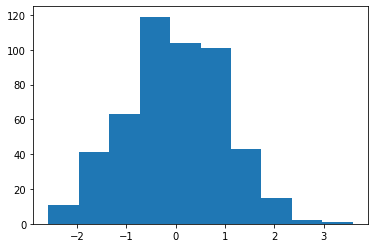

In [35]:
plt.hist(z_group["Edad"])

In [36]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [37]:
doble_grupo.transform(fill_na_mean)

,Altura,Peso,Edad,Ingreso
0,121.105334,60.586384,26.866453,51500
1,149.542718,55.672485,30.799029,217500
2,169.770385,61.715398,21.263365,112500
3,132.062929,94.442491,45.315431,51500
4,172.750533,65.737278,4.459296,112500
...,...,...,...,...
495,155.396546,64.977534,8.751968,55000
496,157.154749,69.343994,22.626405,95000
497,151.448050,47.346753,39.513564,102000
498,141.193239,82.064505,47.961565,65500


## Operaciones diversas muy útiles

In [38]:
doble_grupo.head(1)

,Genero,Estatus Economico,Altura,Peso,Edad,Ingreso
0,Femenino,Pobre,121.105334,60.586384,26.866453,51500
1,Masculino,Rico,149.542718,55.672485,30.799029,217500
2,No Binario,Clase Media,169.770385,61.715398,21.263365,112500
4,Femenino,Clase Media,172.750533,65.737278,4.459296,112500
5,Masculino,Pobre,168.374142,85.383797,15.339581,48000
6,Masculino,Clase Media,139.993238,22.882991,30.327489,95000
18,Femenino,Rico,156.898338,51.977973,28.204041,249000
68,No Binario,Rico,112.670358,25.163384,16.110023,231500
78,No Binario,Pobre,169.070778,88.215059,43.953564,72500


In [39]:
doble_grupo.tail(1)

,Genero,Estatus Economico,Altura,Peso,Edad,Ingreso
442,No Binario,Rico,173.041743,-24.342075,33.593779,224500
482,Masculino,Clase Media,164.191227,69.359675,32.860632,102000
485,Femenino,Rico,189.743192,60.950075,28.049351,217500
490,Masculino,Rico,137.755970,48.994143,40.611484,238500
493,Masculino,Pobre,151.341067,48.810477,26.986647,41000
495,Femenino,Pobre,155.396546,64.977534,8.751968,55000
496,No Binario,Clase Media,157.154749,69.343994,22.626405,95000
498,No Binario,Pobre,141.193239,82.064505,47.961565,65500
499,Femenino,Clase Media,180.511520,80.701626,33.822378,112500


In [41]:
doble_grupo.nth(5)

Altura        Peso       Edad  Ingreso
Genero     Estatus Economico                                            
Femenino   Clase Media        149.369433   93.003049  54.922618   109000
           Pobre              124.934161   62.793544   8.322531    58500
           Rico               161.496406   98.375204  23.768701   221000
Masculino  Clase Media        198.521357   58.294178  38.798962   105500
           Pobre              120.556692  104.401680  15.064271    65500
           Rico               139.775474   74.163627  42.489196   252500
No Binario Clase Media        171.094282   44.739756  31.695524   105500
           Pobre              138.364533   75.465993  30.783648    51500

In [44]:
doble_grupo.nth(82)

,,Altura,Peso,Edad,Ingreso
Genero,Estatus Economico,,,,
Femenino,Pobre,166.975380,87.588212,37.195194,65500
Masculino,Pobre,160.856624,64.810246,30.027561,55000


In [45]:
data_ordenados = data.sort_values(["Edad", "Ingreso"])

In [46]:
data_ordenados.head(10)

,Genero,Estatus Economico,Altura,Peso,Edad,Ingreso
134,Masculino,Pobre,148.850829,24.546759,0.207137,62000
311,Femenino,Pobre,167.186617,78.877707,0.563476,48000
156,Femenino,Rico,157.663010,33.246775,1.279756,252500
275,No Binario,Rico,234.184379,70.421160,1.325927,242000
375,Masculino,Clase Media,161.204161,54.006926,1.815297,88000
292,Masculino,Clase Media,97.136183,49.645039,2.521355,112500
299,Femenino,Pobre,146.637860,84.546395,3.127930,55000
180,Femenino,Clase Media,215.735850,92.585415,4.371826,102000
4,Femenino,Clase Media,172.750533,65.737278,4.459296,112500
388,Masculino,Rico,210.232630,51.354248,4.583027,231500


In [47]:
agrupodos_edad = data_ordenados.groupby("Genero")

In [48]:
agrupodos_edad.head(1)

,Genero,Estatus Economico,Altura,Peso,Edad,Ingreso
134,Masculino,Pobre,148.850829,24.546759,0.207137,62000
311,Femenino,Pobre,167.186617,78.877707,0.563476,48000
275,No Binario,Rico,234.184379,70.421160,1.325927,242000


In [49]:
agrupodos_edad.tail(1)

,Genero,Estatus Economico,Altura,Peso,Edad,Ingreso
491,No Binario,Clase Media,155.765853,50.701967,49.834246,81000
443,Femenino,Pobre,146.294407,67.372617,60.068551,48000
194,Masculino,Pobre,118.406309,107.645087,74.897721,69000


# Conjunto de entrenamiento y conjunto de testing

In [ ]:
# import pandas as pd

In [54]:
data = pd.read_csv("./customer-churn-model/Customer Churn Model.txt")

In [55]:
len(data)

3333

## Dividir utilizando la distribución normal

In [56]:
a = np.random.randn(len(data))

(array([ 18.,  86., 288., 631., 925., 761., 448., 147.,  22.,   7.]),
 array([-3.37191096, -2.66009981, -1.94828866, -1.23647751, -0.52466636,
         0.18714478,  0.89895593,  1.61076708,  2.32257823,  3.03438938,
         3.74620053]),
 <BarContainer object of 10 artists>)

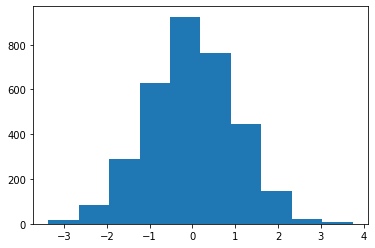

In [57]:
plt.hist(a)

In [58]:
check = (a<0.75)

In [59]:
check

array([ True, False,  True, ...,  True,  True, False])

(array([  6.,  19.,  43.,  91., 188., 287., 429., 521., 524., 454.]),
 array([-3.37191096, -2.95981575, -2.54772055, -2.13562534, -1.72353013,
        -1.31143493, -0.89933972, -0.48724452, -0.07514931,  0.33694589,
         0.7490411 ]),
 <BarContainer object of 10 artists>)

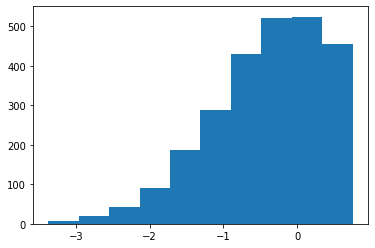

In [64]:
plt.hist(a[check])

In [61]:
training = data[check]
testing = data[~check]

In [62]:
len(training)

2562

In [63]:
len(testing)

771

## Con la libreria sklearn

In [66]:
import sklearn

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
train, test = train_test_split(data, test_size = 0.2)

In [70]:
len(train)

2666

In [71]:
len(test)

667

## Usando una función de shuffle

In [72]:
import numpy as np

In [73]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [ ]:
import sklearn

In [74]:
data = sklearn.utils.shuffle(data)

In [75]:
cut_id     = int(0.75*len(data))
train_data = data[:cut_id]
test_data  = data[cut_id+1:]

In [76]:
len(train_data)

2499

In [77]:
len(test_data)

833